# `clust-learn` - Module 4: Classifier 分类

This guide shows how to use the `classifier` module of the `clust-learn` package to fit a classification model to further explain the clustres previously obtained.

本指南展示了如何使用clust-learn包中的classifier模块来拟合一个分类模型，以进一步解释之前获得的聚类。

Note this module can also be used independently to fit a classification model for data that is not necessarily the output of clustering.

注意，这个模块也可以独立使用，用于拟合一个分类模型，数据不一定是聚类的输出。

## 0. Setup

In [1]:
import numpy as np
import pandas as pd

from clearn.classifier import Classifier

pd.set_option('display.max_columns', None)

d:\Anaconda\envs\xai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Data loading

Original dataset with corresponding cluster labels.

包含相应聚类标签的原始数据集。

In [2]:
df = pd.read_csv('data_MAC/data_澳门_modified_preprocessed_clustered_output.csv')
df.head()

,ASDAGE,ASRREA,ASRLIT,ASRINF,ASRIIE,ASRRSI,ASBGSEC,ASBGSSB,ASBGSB,ASBGERL,ASBGDRL,ASBGSLR,ASBGSCR,ASBGHRL,ASBHSES,ASBHELA,ASBHENA,ASBHELN,ASBHELT,ASBHPCS,ASBHPLR,ACBG09,ACBG15,ACBG16,ACBGRRS,ACBGEAS,ACBGDAS,ACDGTIHY,ATBG01,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBGEAS,ATBGSOS,ATBGTJS,ATBGSLI,ATDGLIHY,ATDGRIHY,ITSEX,ASRIBM,ASBG03,ASBG05A,ASBG05B,ASBG05E,ASBG05F,ASBG05G,ASBG05H,ASBG05I,ASBG05J,ASBG05K,ASBG06,ASBG07A,ASBG07B,ASBG08A,ASBG08B,ASBG10F,ASBR03A,ASBR03B,ASBR03C,ASBR04,ASBR05,ASDGSEC,ASDGSSB,ASDGSB,ASDGERL,ASDGDRL,ASDGSLR,ASDGSCR,ASDG05S,ASBH02A,ASBH02B,ASBH03A,ASBH03B,ASBH03C,ASBH03D,ASBH03E,ASBH04,ASBH06,ASBH07F,ASBH09,ASBH14A,ASBH14B,ASBH14C,ASBH16,ASBH18AA,ASBH18AB,ASBH18BA,ASBH18BB,ASBH18CA,ASBH18CB,ASBH18DA,ASBH18DB,ASBH18EA,ASBH18EB,ASBH19,ASBH20A,ASBH20B,ASBH20C,ASBH21A,ASBH21B,ASBH21C,ASBH21D,ASBH22,ASDGHRL,ASDHSES,ASDHELA,ASDHENA,ASDHELN,ASDHELT,ASDHPCS,ASDHPLR,ASDHAPS,ASDHEDUP,ASDHOCCP,ACBG04,ACBG05A,ACBG05B,ACBG07A,ACBG07B,ACBG07C,ACBG08,ACBG13,ACBG14A,ACBG14B,ACBG14C,ACBG14D,ACBG14E,ACBG14F,ACBG14G,ACBG14H,ACBG14I,ACBG14J,ACBG14K,ACBG14L,ACBG14M,ACBG14N,ACBG17,ACBG18A,ACBG18B,ACBG18C,ACBG19,ACBG20,ACBG21A,ACBG21B,ACBG21C,ACBG21D,ACBG21E,ACBG21F,ACDGRRS,ACDGEAS,ACDGDAS,ACDGSBC,ATBG02,ATBG03,ATBG05AA,ATBG05AB,ATBG05AC,ATBG05AD,ATBG05BA,ATBG05BB,ATBG05BC,ATBG05BD,ATBG05BE,ATBG05BF,ATBG05BG,ATBG05BH,ATBG05BI,ATBG05BJ,ATBG05BK,ATBG06,ATBG07AA,ATBG07BA,ATBG07AB,ATBG07BB,ATBG07AC,ATBG07BC,ATBG07AD,ATBG07BD,ATBG07AE,ATBG07BE,ATBG07AF,ATBG07BF,ATBG07AG,ATBG07BG,ATBG08A,ATBG08B,ATBG08C,ATBG08D,ATBG08E,ATBG09A,ATBG09B,ATBG09C,ATBG09D,ATBR06A,ATBR06B,ATBR06C,ATBR06D,ATBR06E,ATBR07AA,ATBR07AB,ATBR07AC,ATBR07AD,ATBR07BA,ATBR07BB,ATBR07BC,ATBR07BD,ATBR08A,ATBR08B,ATBR08C,ATBR08D,ATBR08E,ATBR08F,ATBR08G,ATBR08H,ATBR09A,ATBR09B,ATBR09C,ATBR09D,ATBR09E,ATBR09F,ATBR09G,ATBR09H,ATBR09I,ATBR10A,ATBR10B,ATBR10C,ATBR10D,ATBR10E,ATBR10F,ATBR10G,ATBR10H,ATBR10I,ATBR10J,ATBR10K,ATBR10L,ATBR11A,ATBR11B,ATBR11C,ATBR11D,ATBR11E,ATBR12A,ATBR12BA,ATBR12BB,ATBR12BC,ATBR12BD,ATBR12C,ATBR12DA,ATBR12DB,ATBR12DC,ATBR12EA,ATBR12EB,ATBR12EC,ATBR12ED,ATBR12EE,ATBR13A,ATBR13B,ATBR13C,ATBR13D,ATBR13E,ATBR14,ATBR15,ATBR16,ATBR17A,ATBR17B,ATBR17C,ATBR18A,ATBR18B,ATBR18C,ATBR18D,ATBR18E,ATBR19,ATDGEAS,ATDGSOS,ATDGTJS,ATDGSLI,cluster,cluster_cat
0,9.42,587.780784,542.688460,561.873268,559.364444,572.057562,8.77882,9.15299,8.18398,8.54449,10.98651,11.30153,10.28978,10.89263,10.72985,9.79887,10.50035,10.11630,10.80194,12.13203,9.58447,300.0,17.0,17.0,9.24037,11.32571,12.9615,910.0,32.0,34.0,34.0,1.0,8.0,9.44107,13.6815,8.67953,10.27928,182.0,58.5,1,4,2,1,1,2,2,1,1,2,2,2,3,3,3,2,2,2,1,1,3,1,2,2,2,2,2,2,1,1,3,1,1,1,2,2,2,2,2,2,1,3,1,1,1,6,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,1,2,4,1,1,1,1,1,1,2,1,1,4,2,1,1,1,1,1,4,2,3,3,4,4,4,4,3,1,1,2,5,1,1,1,1,1,1,1,2,2,1,2,1,5,1,2,2,1,3,2,3,3,2,3,2,2,2,3,2,3,1,1,2,1,2,1,2,1,2,2,1,1,1,1,1,2,1,2,2,2,3,2,1,2,4,4,3,2,1,3,4,2,1,3,3,3,2,2,2,2,2,3,3,3,1,3,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,2,3,3,3,2,2,3,3,4,2,2,2,2,2,4,3,3,3,4,4,4,4,4,1,3,3,1,1,4,5,3,1,2,1,1,1,2,1,1,5,2,1,2,2,0,STU_0
1,10.42,576.604190,557.383710,612.571176,553.744260,594.721688,10.12086,9.82079,7.90321,10.04280,9.89746,9.17072,7.84162,10.22238,10.34719,7.61837,9.62426,8.57506,11.18387,10.10603,10.14182,300.0,17.0,17.0,9.24037,11.32571,12.9615,910.0,32.0,34.0,34.0,1.0,8.0,9.44107,13.6815,8.67953,10.27928,182.0,58.5,1,4,1,1,2,1,1,1,2,2,2,2,5,2,3,2,2,1,2,1,3,2,4,2,1,2,1,2,2,3,2,1,1,1,2,2,2,2,2,3,2,2,1,1,1,5,1,1,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,1,2,4,1,1,1,1,1,1,2,1,1,4,2,1,1,1,1,1,4,2,3,3,4,4,4,4,3,1,1,2,5,1,1,1,1,1,1,1,2,2,1,2,1,5,1,2,2,1,3,2,3,3,2,3,2,2,2,3,2,3,1,1,2,1,2,1,2,1,2,2,1,1,1,1,1,2,1,2,2,2,3,2,1,2,4,4,3,2,1,3,4,2,1,3,3,3,2,2,2,2,2,3,3,3,1,3,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,2,3,3,3,2,2,3,3,4,2,2,2,2,2,4,3,3,3,4,4,4,4,4,1,3,3,1,1,4,5,3,1,2,1,1,1,2,1,1,5,2,1,2,2,6,STU_6
2,10.25,566.230546,527.062732,573.717150,555.513492,571.133264,11.61875,12.85262,10.28695,13.33453,13.15938,9.86291,10.90567,9.91526,9.65449,10.77067,13.20593,11.82488,12.7

In [3]:
# 一共有多少类别
print("一共有多少类别:\n", df['cluster'].value_counts())

一共有多少类别:
 cluster
4    927
2    694
1    634
5    496
3    492
0    469
6    397
Name: count, dtype: int64


Lower dimensional dataset with corresponding cluster labels.

包含相应聚类标签的降维数据集。


In [4]:
df_red = pd.read_csv('data_MAC/data_澳门_modified_preprocessed_dim_red_clustered_output.csv')
df_red.head()

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,cluster,cluster_cat
0,0.815932,1.264225,-0.076468,0.100716,0.601086,1.090327,0.999779,0.982890,0.637996,-0.287790,0.141972,-0.144201,0.058617,0.015522,0.046188,-0.048908,0.056092,-0.132033,0.187897,0,STU_0
1,1.226054,-0.463218,-0.078526,0.001208,0.251024,1.109318,1.011749,0.865645,1.327930,-1.028564,0.149748,-0.141755,0.026671,-0.004588,0.039310,-0.055719,0.069045,-0.094534,0.188298,6,STU_6
2,0.671452,3.180713,0.009165,2.513515,-0.761482,1.008830,1.096131,0.806445,1.155544,1.293047,0.110457,-0.142440,0.069968,0.055828,0.051336,-0.067240,0.032080,-0.173677,0.177784,0,STU_0
3,0.250057,-1.069115,-0.054095,-1.634936,-0.976487,0.996416,1.042941,0.774892,0.733119,-1.129127,0.183119,-0.136661,-0.023871,-0.052695,0.027002,-0.037854,0.062634,-0.049033,0.206696,1,STU_1
4,0.122797,0.010049,-0.110884,0.931829,0.186828,1.092345,1.011388,0.843977,0.978187,0.746788,0.156626,-0.147515,0.000937,-0.019777,0.029177,-0.056333,0.063191,-0.069714,0.184481,1,STU_1


In [5]:
# 一共有多少类别
print("一共有多少类别:\n", df_red['cluster'].value_counts())

一共有多少类别:
 cluster
4    927
2    694
1    634
5    496
3    492
0    469
6    397
Name: count, dtype: int64


## 2. Classification using extracted components from dimensionality reduction as predictors

使用降维技术提取的成分作为预测变量进行分类

### 2.1. Class instantiation and model fitting 类实例化和模型拟合

In [6]:
# 使用降维后的数据初始化分类器。
# 参数：
# df_red：降维后的数据集。
# list(df_red.columns[:-2])：使用数据集中除最后两列以外的所有列作为特征。
# df_red['cluster']：目标变量（聚类标签）。
# num_cols：指定数值特征。

classifier = Classifier(df_red, list(df_red.columns[:-2]),  df_red['cluster'], num_cols=list(df_red.columns[:-2]))

In [7]:
np.random.seed(42)

In [8]:
# 训练分类模型，并进行超参数调优。
# 参数：
# hyperparameter_tuning=True：启用超参数调优。
# param_grid：指定超参数搜索空间，包括：
# n_estimators：树的数量。
# eta：学习率。
# max_depth：树的最大深度。

classifier.train_model(hyperparameter_tuning=True, param_grid=dict(n_estimators=[30, 60], eta=[0.15, 0.25], max_depth=[3, 5, 7, 9]))

2025-04-27 20:57:05 INFO     clearn.classifier.classifier: Running feature selection...
2025-04-27 20:57:29 INFO     clearn.classifier.classifier: Running hyperparameter tuning...
2025-04-27 20:57:34 INFO     clearn.classifier.classifier: Training model...
2025-04-27 20:57:34 INFO     clearn.classifier.classifier: DONE!


### 模型性能评估

In [9]:
# 查看模型中每个特征的重要性。
classifier.feature_importances

,variable_name,shap_importance
0,dim_01,1.258572
1,dim_03,1.029136
2,dim_06,0.867157
3,dim_02,0.699345
4,dim_08,0.609317
5,dim_05,0.354621
6,dim_07,0.263693
7,dim_11,0.178443
8,dim_12,0.132390


In [10]:
# 查看经过特征选择后保留的特征数量。
len(classifier.filtered_features_)

9

### 2.2. Model performance 模型性能 超参数调优结果

In [11]:
# 查看超参数调优的结果，包括最佳参数和对应的性能指标。
classifier.hyperparameter_tuning_metrics()

XGBClassifier Hyperparameters                        Performance metrics  \
                             eta max_depth n_estimators     mean_test_score   
0                           0.15         3           30            0.871312   
1                           0.15         3           60            0.880132   
2                           0.15         5           30            0.881958   
3                           0.15         5           60            0.883785   
4                           0.15         7           30            0.878916   
5                           0.15         7           60            0.881351   
6                           0.15         9           30            0.876788   
7                           0.15         9           60            0.882568   
8                           0.25         3           30            0.877395   
9                           0.25         3           60            0.889868   
10                          0.25         5           30            0.880132   
11                          0.25         5           60            0.884697   
12                          0.25         7           30            0.879526   
13                          0.25         7           60            0.882871   
14                          0.25         9           30            0.885001   
15                          0.25         9           60            0.888347   

                   
   std_test_score  
0        0.005195  
1        0.008069  
2        0.002315  
3        0.001696  
4        0.003697  
5        0.004470  
6        0.005196  
7        0.004772  
8        0.007167  
9        0.005671  
10       0.005277  
11       0.005507  
12       0.005360  
13       0.004972  
14       0.003959  
15       0.003466

In [12]:
# 查看训练好的模型对象。
classifier.model_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, ...)

In [13]:
# # 获取训练集中的所有类别
# all_classes = classifier.df['cluster'].unique()

In [14]:
# 查看模型在测试集上的混淆矩阵。
classifier.confusion_matrix()

Predicted values                                     \
                                 0          1           2           3   
Observed values 0        87.000000    2.00000    0.000000    2.000000   
                1         4.000000  113.00000    5.000000    1.000000   
                2         0.000000    0.00000  111.000000    0.000000   
                3         5.000000    4.00000    0.000000  102.000000   
                4         0.000000    3.00000    4.000000    0.000000   
                5         3.000000    1.00000    2.000000    1.000000   
                6         2.000000    1.00000    0.000000    0.000000   
precision                 0.861386    0.91129    0.909836    0.962264   

                                                       recall  
                            4          5          6            
Observed values 0    3.000000   7.000000   0.000000  0.861386  
                1   12.000000   0.000000   2.000000  0.824818  
                2    5.000000   4.000000   0.000000  0.925000  
                3    2.000000   2.000000   1.000000  0.879310  
                4  163.000000   4.000000   1.000000  0.931429  
                5    2.000000  90.000000   0.000000  0.909091  
                6    4.000000   0.000000  67.000000  0.905405  
precision            0.853403   0.841121   0.943662  0.891727

In [15]:
# 查看模型在训练集上的混淆矩阵。
classifier.confusion_matrix(test=False)

Predicted values                                     \
                                 0          1           2           3   
Observed values 0       357.000000    3.00000    2.000000    0.000000   
                1         3.000000  489.00000    0.000000    1.000000   
                2         0.000000    3.00000  564.000000    0.000000   
                3         1.000000    3.00000    0.000000  372.000000   
                4         2.000000    1.00000    5.000000    0.000000   
                5         1.000000    0.00000    0.000000    0.000000   
                6         0.000000    0.00000    0.000000    0.000000   
precision                 0.980769    0.97996    0.987741    0.997319   

                                                    recall  
                            4           5      6            
Observed values 0    5.000000    1.000000    0.0  0.970109  
                1    4.000000    0.000000    0.0  0.983903  
                2    7.000000    0.000000    0.0  0.982578  
                3    0.000000    0.000000    0.0  0.989362  
                4  744.000000    0.000000    0.0  0.989362  
                5    2.000000  394.000000    0.0  0.992443  
                6    0.000000    0.000000  323.0  1.000000  
precision            0.976378    0.997468    1.0  0.986614

### 2.2. Model performance 模型性能 超参数调优结果

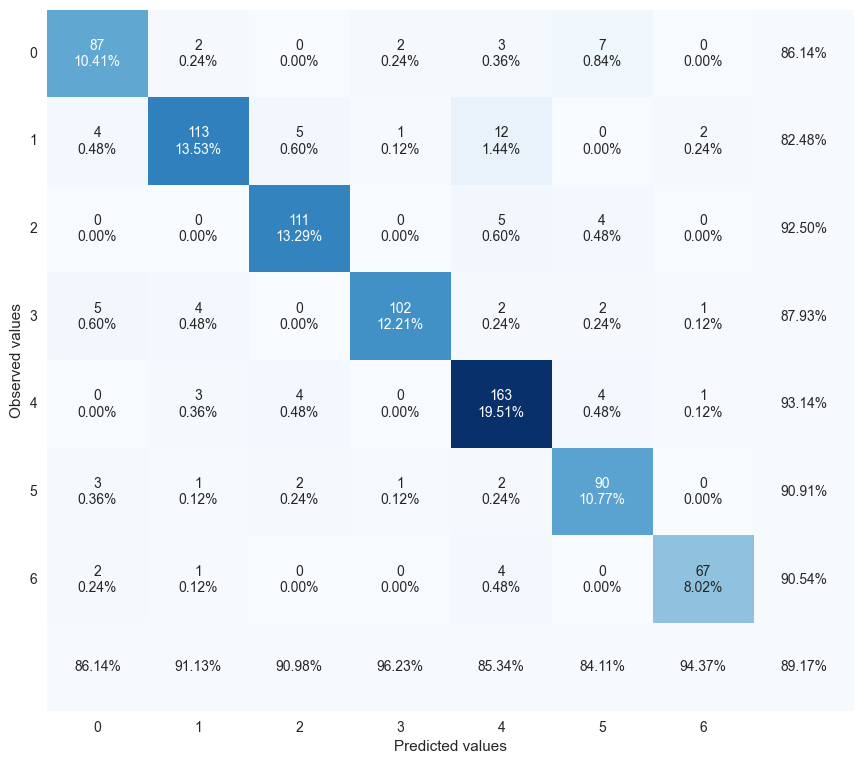

In [16]:
# 绘制混淆矩阵的可视化图表。
classifier.plot_confusion_matrix()

In [17]:
# 查看模型在训练集上的混淆矩阵。
classifier.confusion_matrix(test=False)

Predicted values                                     \
                                 0          1           2           3   
Observed values 0       357.000000    3.00000    2.000000    0.000000   
                1         3.000000  489.00000    0.000000    1.000000   
                2         0.000000    3.00000  564.000000    0.000000   
                3         1.000000    3.00000    0.000000  372.000000   
                4         2.000000    1.00000    5.000000    0.000000   
                5         1.000000    0.00000    0.000000    0.000000   
                6         0.000000    0.00000    0.000000    0.000000   
precision                 0.980769    0.97996    0.987741    0.997319   

                                                    recall  
                            4           5      6            
Observed values 0    5.000000    1.000000    0.0  0.970109  
                1    4.000000    0.000000    0.0  0.983903  
                2    7.000000    0.000000    0.0  0.982578  
                3    0.000000    0.000000    0.0  0.989362  
                4  744.000000    0.000000    0.0  0.989362  
                5    2.000000  394.000000    0.0  0.992443  
                6    0.000000    0.000000  323.0  1.000000  
precision            0.976378    0.997468    1.0  0.986614

In [18]:
# 查看分类报告，包括精确率（precision）、召回率（recall）和 F1 分数。
classifier.classification_report()

,precision,recall,f1-score,support
0,0.861386,0.861386,0.861386,101.000000
1,0.911290,0.824818,0.865900,137.000000
2,0.909836,0.925000,0.917355,120.000000
3,0.962264,0.879310,0.918919,116.000000
4,0.853403,0.931429,0.890710,175.000000
5,0.841121,0.909091,0.873786,99.000000
6,0.943662,0.905405,0.924138,74.000000
accuracy,0.891727,0.891727,0.891727,0.891727
macro avg,0.897566,0.890920,0.893171,822.000000
weighted avg,0.894279,0.891727,0.891814,822.000000


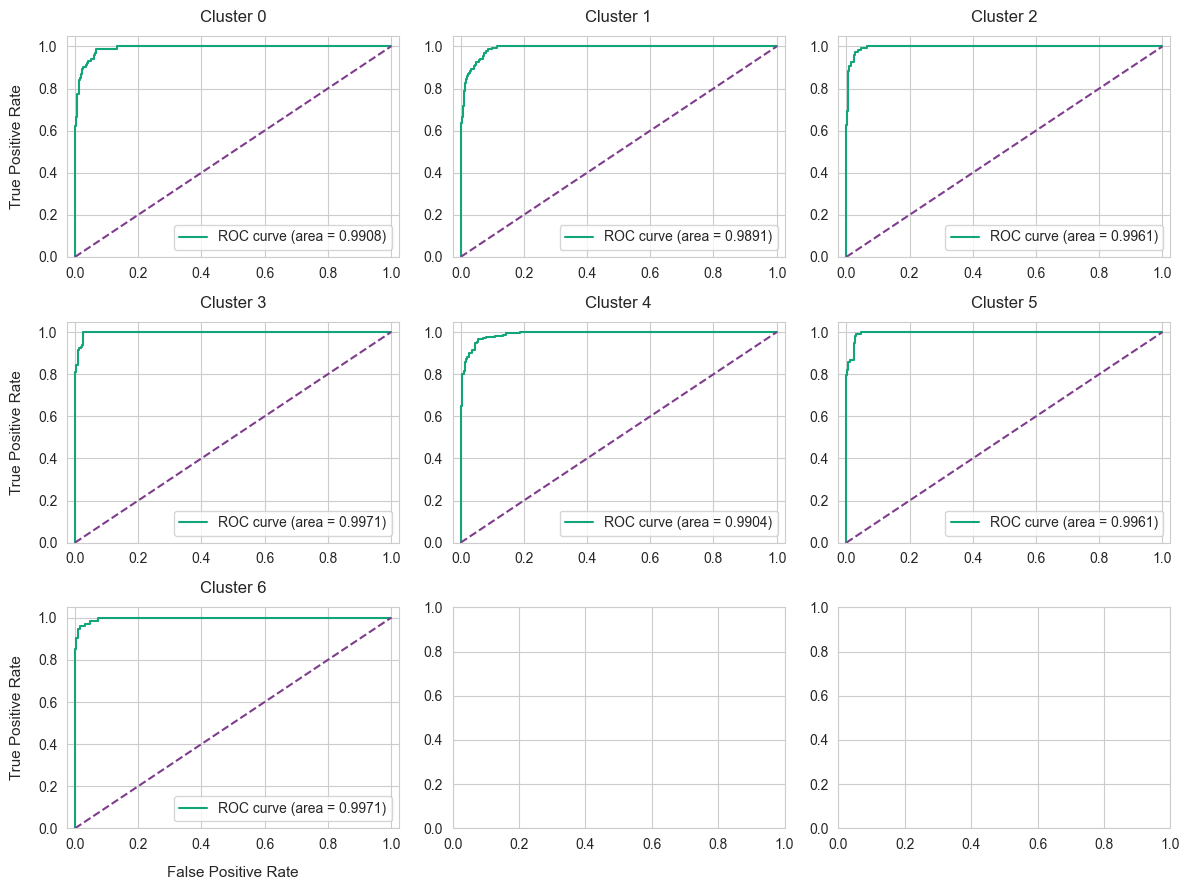

In [19]:
# 绘制模型的 ROC 曲线，评估分类性能
classifier.plot_roc_curves()

### 2.3. Model explainability 模型可解释性

#### 2.3.1. Global feature importance 全局特征重要性

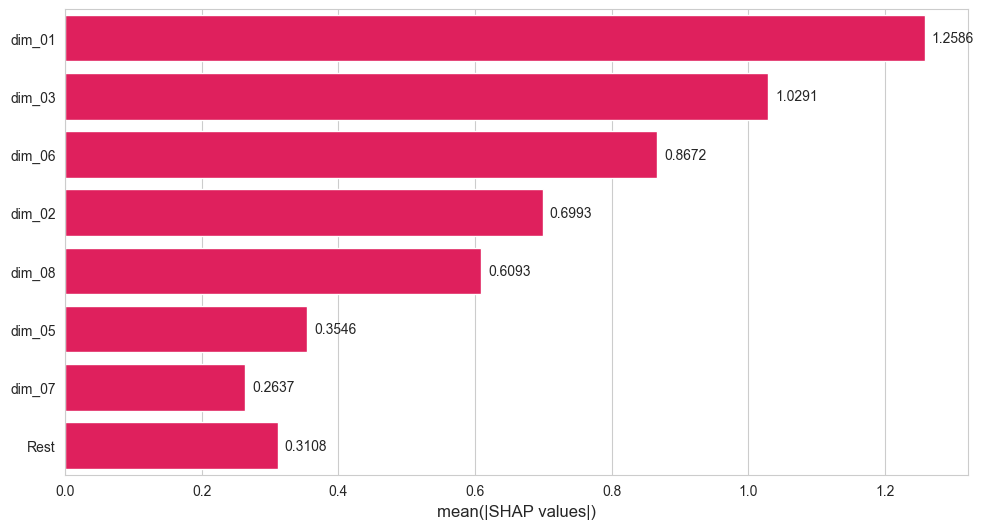

In [20]:
# 使用 SHAP（SHapley Additive exPlanations）方法绘制全局特征重要性。
classifier.plot_shap_importances()

#### 2.3.2. Detailed feature importance by class (cluster label)

按类别（聚类标签）的详细特征重要性。

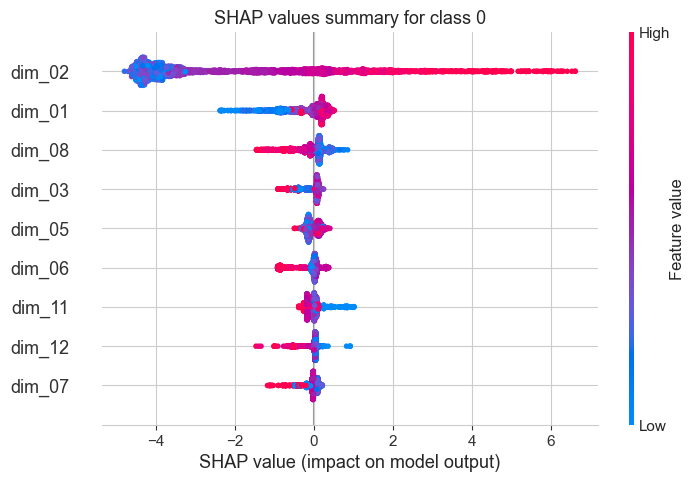

In [21]:
classifier.plot_shap_importances_beeswarm(class_id=0)

绘制类别 0 的特征重要性...


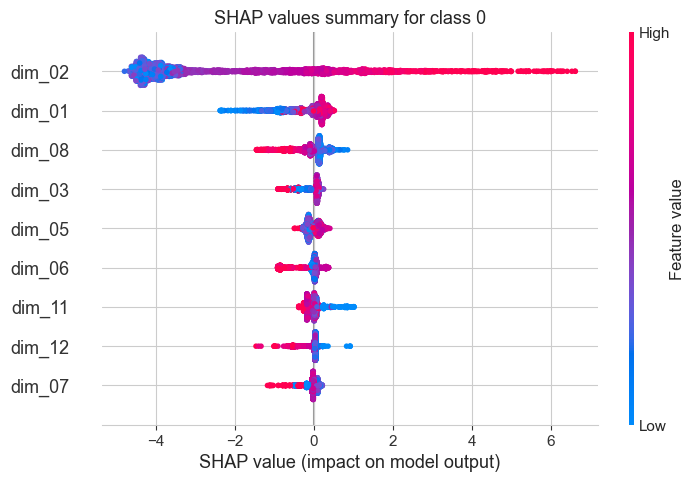

绘制类别 1 的特征重要性...


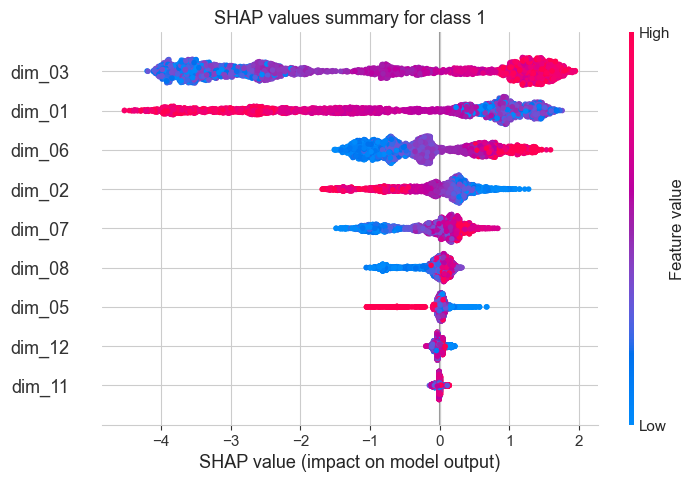

绘制类别 2 的特征重要性...


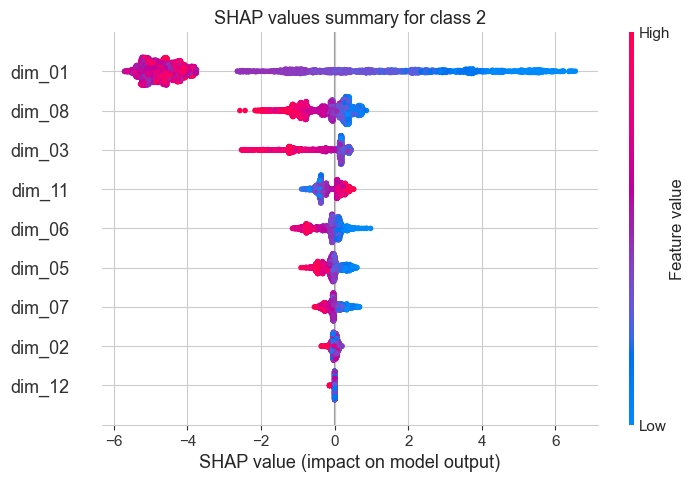

绘制类别 3 的特征重要性...


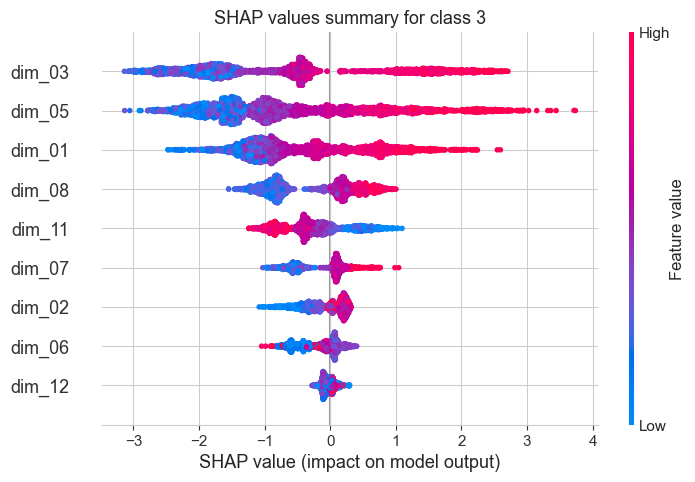

绘制类别 4 的特征重要性...


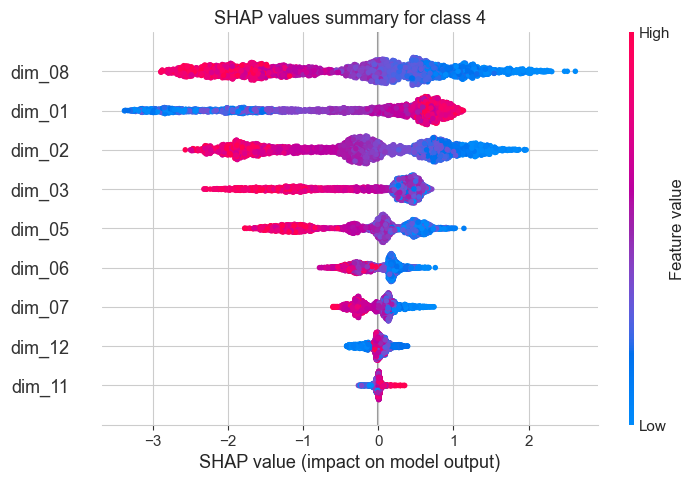

绘制类别 5 的特征重要性...


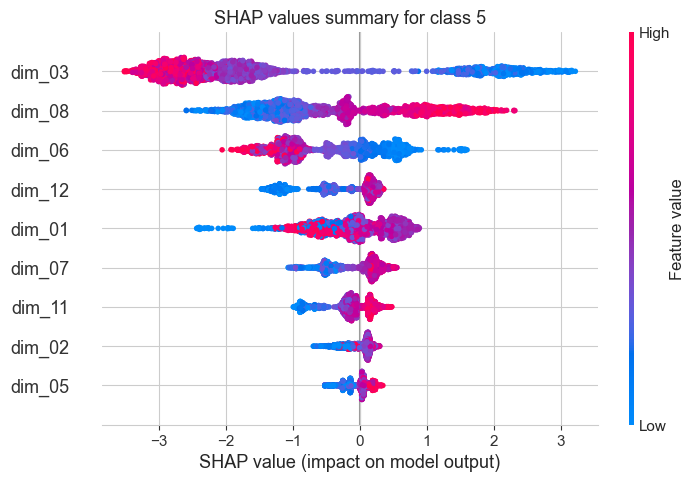

绘制类别 6 的特征重要性...


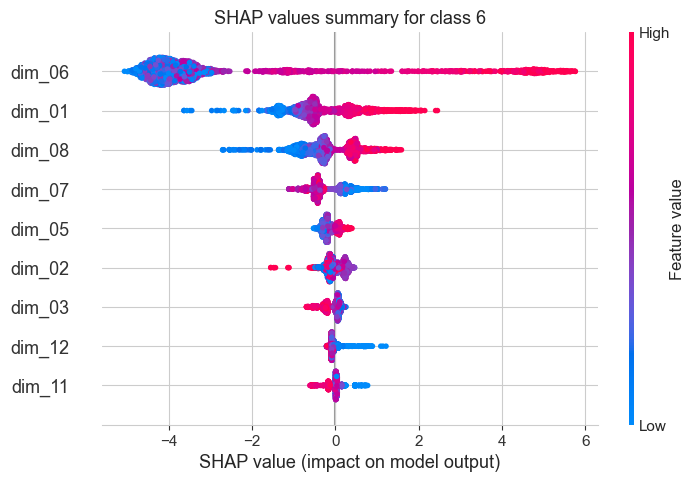

In [22]:
# 使用 SHAP 方法绘制指定类别（如 class_id=0）的特征重要性。
# 获取所有类别的唯一值
from matplotlib import pyplot as plt
all_classes = df_red['cluster'].unique()

# 按顺序绘制特征重要性
for class_id in sorted(all_classes):
    print(f"绘制类别 {class_id} 的特征重要性...")
    classifier.plot_shap_importances_beeswarm(class_id=class_id)
    plt.show()  # 确保每个图表单独显示
    

## Reproduciblity check 可重复性检查。

In [23]:
# 导出预测结果 使用训练好的模型对数据进行预测，并将结果保存到 CSV 文件中。
final = classifier.df[classifier.filtered_features_ + ['cluster']].copy()
final['cluster_pred'] = classifier.model_.predict(classifier.df[classifier.filtered_features_])
final.to_csv('data_MAC/data_澳门_modified_dimred_vars_classification_output.csv', index=False)

In [24]:
# 比较预测结果 加载参考结果，并与当前结果进行比较，检查维度和预测是否一致。
df_ref = pd.read_csv('data_MAC/data_澳门_modified_dimred_vars_classification_output.csv')

print('Diff in dimension', np.abs(df_ref.shape[1] - final.shape[1]))
print('Diff in prediction', (df_ref['cluster_pred'] != final['cluster_pred']).sum())

Diff in dimension 0
Diff in prediction 0


## 3. Classification using the original variables as predictors

使用原始变量作为预测因子进行分类。

First, we separate numerical from categorical variables.

首先，我们将数值变量与分类变量区分开来。

In [25]:
num_vars = ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG05J', 'ASBG05K', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18AB', 'ASBH18BA', 'ASBH18BB', 'ASBH18CA', 'ASBH18CB', 'ASBH18DA', 'ASBH18DB', 'ASBH18EA', 'ASBH18EB', 'ASBH19', 'ASBH20A', 'ASBH20B', 'ASBH20C', 'ASBH21A', 'ASBH21B', 'ASBH21C', 'ASBH21D', 'ASBH22', 'ASDGHRL', 'ASDHSES', 'ASDHELA', 'ASDHENA', 'ASDHELN', 'ASDHELT', 'ASDHPCS', 'ASDHPLR', 'ASDHAPS', 'ASDHEDUP', 'ASDHOCCP', 'ACBG04', 'ACBG05A', 'ACBG05B', 'ACBG07A', 'ACBG07B', 'ACBG07C', 'ACBG08', 'ACBG13', 'ACBG14A', 'ACBG14B', 'ACBG14C', 'ACBG14D', 'ACBG14E', 'ACBG14F', 'ACBG14G', 'ACBG14H', 'ACBG14I', 'ACBG14J', 'ACBG14K', 'ACBG14L', 'ACBG14M', 'ACBG14N', 'ACBG17', 'ACBG18A', 'ACBG18B', 'ACBG18C', 'ACBG19', 'ACBG20', 'ACBG21A', 'ACBG21B', 'ACBG21C', 'ACBG21D', 'ACBG21E', 'ACBG21F', 'ACDGRRS', 'ACDGEAS', 'ACDGDAS', 'ACDGSBC', 'ATBG02', 'ATBG03', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA', 'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBR06A', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB', 'ATBR07AC', 'ATBR07AD', 'ATBR07BA', 'ATBR07BB', 'ATBR07BC', 'ATBR07BD', 'ATBR08A', 'ATBR08B', 'ATBR08C', 'ATBR08D', 'ATBR08E', 'ATBR08F', 'ATBR08G', 'ATBR08H', 'ATBR09A', 'ATBR09B', 'ATBR09C', 'ATBR09D', 'ATBR09E', 'ATBR09F', 'ATBR09G', 'ATBR09H', 'ATBR09I', 'ATBR10A', 'ATBR10B', 'ATBR10C', 'ATBR10D', 'ATBR10E', 'ATBR10F', 'ATBR10G', 'ATBR10H', 'ATBR10I', 'ATBR10J', 'ATBR10K', 'ATBR10L', 'ATBR11A', 'ATBR11B', 'ATBR11C', 'ATBR11D', 'ATBR11E', 'ATBR12A', 'ATBR12BA', 'ATBR12BB', 'ATBR12BC', 'ATBR12BD', 'ATBR12C', 'ATBR12DA', 'ATBR12DB', 'ATBR12DC', 'ATBR12EA', 'ATBR12EB', 'ATBR12EC', 'ATBR12ED', 'ATBR12EE', 'ATBR13A', 'ATBR13B', 'ATBR13C', 'ATBR13D', 'ATBR13E', 'ATBR14', 'ATBR15', 'ATBR16', 'ATBR17A', 'ATBR17B', 'ATBR17C', 'ATBR18A', 'ATBR18B', 'ATBR18C', 'ATBR18D', 'ATBR18E', 'ATBR19', 'ATDGEAS', 'ATDGSOS', 'ATDGTJS', 'ATDGSLI']

### 3.1. Class instantiation and model fitting 类实例化和模型拟合

In [26]:

# 使用原始数据初始化分类器。
classifier = Classifier(df, list(df.columns[:-2]),  df['cluster'], num_cols=num_vars, cat_cols=cat_vars)

In [27]:
np.random.seed(42)

In [28]:
# ASBGSEC	DIGITAL SELF-EFFICACY/SCL	数字自我效能/量表
# ASDGSEC	DIGITAL SELF-EFFICACY/IDX	数字自我效能/指数
# ASBGSSB	STUDENTS SENSE OF SCHOOL BELONGING/SCL	学生学校归属感/量表
# ASDGSSB	STUDENTS SENSE OF SCHOOL BELONGING/IDX	学生学校归属感/指数
# ASBGSB	STUDENT BULLYING/SCL	学生欺凌/量表
# ASDGSB	STUDENT BULLYING/IDX	学生欺凌/指数
# ASBGERL	STUDENTS ENGAGED IN READING LESSONS/SCL	学生参与阅读课程/量表
# ASDGERL	STUDENTS ENGAGED IN READING LESSONS/IDX	学生参与阅读课程/指数
# ASBGDRL	DISORDERLY BEHAVIOR DURING REA LESSONS/SCL	阅读课程中的不良行为/量表
# ASDGDRL	DISORDERLY BEHAVIOR DURING REA LESSONS/IDX	阅读课程中的不良行为/指数
# ASBGSLR	STUDENTS LIKE READING/SCL	喜欢阅读的学生/量表
# ASDGSLR	STUDENTS LIKE READING/IDX	喜欢阅读的学生/指数
# ASBGHRL	HOME RESOURCES FOR LEARNING/SCL	家庭学习资源/量表
# ASDGHRL	HOME RESOURCES FOR LEARNING/IDX	家庭学习资源/指数
# ASBGSCR	STUDENTS CONFIDENT IN READING/SCL	学生阅读自信/量表
# ASDGSCR	STUDENTS CONFIDENT IN READING/IDX	学生阅读自信/指数
# ASDG05S	NUMBER OF HOME STUDY SUPPORTS	家庭学习支持数量


# ASBGHRL	HOME RESOURCES FOR LEARNING/SCL	家庭学习资源/量表
# ASDGHRL	HOME RESOURCES FOR LEARNING/IDX	家庭学习资源/指数
# ASBHSES	HOME SOCIOECONOMIC STATUS/SCL	家庭社会经济地位/量表
# ASDHSES	HOME SOCIOECONOMIC STATUS/IDX	家庭社会经济地位/指数
# ASBHELA	EARLY LIT ACTIVITIES BEFORE SCHOOL/SCL	学前早期文学活动/量表
# ASDHELA	EARLY LIT ACTIVITIES BEFORE SCHOOL/IDX	学前早期文学活动/指数
# ASBHENA	EARLY NUM ACTIVITIES BEFORE SCHOOL/SCL	学前早期数学活动/量表
# ASDHENA	EARLY NUM ACTIVITIES BEFORE SCHOOL/IDX	学前早期数学活动/指数
# ASBHELN	EARLY LIT NUM ACTIV BEFORE SCHOOL/SCL	学前早期文学数学活动/量表
# ASDHELN	EARLY LIT NUM ACTIV BEFORE SCHOOL/IDX	学前早期文学数学活动/指数
# ASBHELT	EARLY LITERACY TASKS/SCL	早期文学任务/量表
# ASDHELT	EARLY LITERACY TASKS/IDX	早期文学任务/指数
# ASBHPCS	PARENTS PERCEPTIONS OF CHILD SCHOOL/SCL	父母对孩子学校的看法/量表
# ASDHPCS	PARENTS PERCEPTIONS OF CHILD SCHOOL/IDX	父母对孩子学校的看法/指数
# ASBHPLR	PARENTS LIKE READING/SCL	父母喜欢阅读/量表
# ASDHPLR	PARENTS LIKE READING/IDX	父母喜欢阅读/指数
# ASDHAPS	STUDENT ATTENDED PRESCHOOL	学生是否上过学前教育
# ASDHEDUP	PARENTS' HIGHEST EDUCATION LEVEL	父母最高教育水平
# ASDHOCCP	PARENTS' HIGHEST OCCUPATION LEVEL	父母最高职业水平

# ACBGRRS	INSTR AFF BY REA RES SHORTAGE-PRNCPL/SCL	教学受阅读资源短缺影响-校长/量表
# ACDGRRS	INSTR AFF BY REA RES SHORTAGE-PRNCPL/IDX	教学受阅读资源短缺影响-校长/指数
# ACBGEAS	SCHOOL EMPH ON ACAD SUCCESS-PRNCPL/SCL	学校强调学术成功-校长/量表
# ACDGEAS	SCHOOL EMPH ON ACAD SUCCESS-PRNCPL/IDX	学校强调学术成功-校长/指数
# ACBGDAS	SCHOOL DISCIPLINE-PRNCPL/SCL	学校纪律-校长/量表
# ACDGDAS	SCHOOL DISCIPLINE-PRNCPL/IDX	学校纪律-校长/指数
# ACDGSBC	SCHOOL COMPOSITION BY STD BACKGROUND	学校学生背景构成
# ACDGTIHY	TOTAL INSTRUCTIONAL HOURS PER YEAR	每年总教学小时数


# ATBGEAS	SCHOOL EMPH ON ACAD SUCCESS-TCHR/SCL	学校强调学术成功-教师/量表
# ATDGEAS	SCHOOL EMPH ON ACAD SUCCESS-TCHR/IDX	学校强调学术成功-教师/指数
# ATBGSOS	SAFE AND ORDERLY SCHOOLS-TCHR/SCL	安全有序学校-教师/量表
# ATDGSOS	SAFE AND ORDERLY SCHOOLS-TCHR/IDX	安全有序学校-教师/指数
# ATBGTJS	TEACHERS JOB SATISFACTION/SCL	教师工作满意度/量表
# ATDGTJS	TEACHERS JOB SATISFACTION/IDX	教师工作满意度/指数
# ATBGSLI	TEACHING LIMITED BY STUDENT NOT READY/SCL	教学因学生未准备好受限/量表
# ATDGSLI	TEACHING LIMITED BY STUDENT NOT READY/IDX	教学因学生未准备好受限/指数
# ATDGLIHY	LANGUAGE INSTRUCTIONAL HOURS PER YEAR	每年语言教学小时数
# ATDGRIHY	READING INSTRUCTIONAL HOURS PER YEAR	每年阅读教学小时数




In [29]:

# 数值变量	ATBGEAS	    学校强调学术成功-教师/量表
# 分类变量	ATDGEAS	    学校强调学术成功-教师/指数
# 数值变量	ATBGSOS	    安全有序学校-教师/量表
# 分类变量	ATDGSOS	    安全有序学校-教师/指数
# 数值变量	ATBGTJS	    教师工作满意度/量表
# 分类变量	ATDGTJS	    教师工作满意度/指数
# 数值变量	ATBGSLI	    教学因学生未准备好受限/量表
# 分类变量	ATDGSLI	    教学因学生未准备好受限/指数
# 数值变量	ATDGLIHY    每年语言教学小时数
# 数值变量	ATDGRIHY	每年阅读教学小时数


# ['ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
# ['ATDGEAS', 'ATDGSOS','ATDGTJS',  'ATDGSLI']
# ['ATBGEAS', 'ATDGEAS','ATBGSOS', 'ATDGSOS','ATBGTJS','ATDGTJS', 'ATBGSLI', 'ATDGSLI','ATDGLIHY', 'ATDGRIHY']

# 使用指定的特征训练分类模型，并进行超参数调优。
classifier.train_model(features_to_keep=[
    # "ASDGSEC", "ASDGSSB", "ASDGSB", "ASDGERL","ASDGDRL", "ASDGSLR", "ASDGSCR", 
    "ASBGSEC", "ASBGSSB", "ASBGSB", "ASBGERL", "ASBGDRL", "ASBGSLR", "ASBGSCR",
# "ASDG05S", 
    # "ASDGHRL", "ASDHSES", 
    "ASBGHRL", "ASBHSES",
# "ASDHELA", "ASDHENA",
# "ASBHELA", "ASBHENA",
    # "ASDHELN",
    "ASBHELN",
    # "ASDHELT","ASDHPCS", "ASDHPLR",
    "ASBHELT", "ASBHPCS", "ASBHPLR",
    "ASDHAPS", 
# "ASDHEDUP", "ASDHOCCP", 
    # "ACDGRRS", "ACDGEAS", "ACDGDAS", "ACDGSBC", "ATDGEAS", "ATDGSOS", "ATDGTJS", "ATDGSLI",
    "ACBGRRS", "ACBGEAS", "ACBGDAS", "ACDGTIHY","ATBGEAS", "ATBGSOS", "ATBGTJS", "ATBGSLI", 
    "ATDGLIHY", "ATDGRIHY"
    ],
    hyperparameter_tuning=True, param_grid=dict(n_estimators=[30, 60], eta=[0.15, 0.25], max_depth=[3, 5, 7, 9]))

2025-04-27 20:57:42 INFO     clearn.classifier.classifier: Running feature selection...
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\Roaming\Python\Python39\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
C:\Users\杨洋\AppData\R

In [30]:

# classifier.feature_importances

# 获取五个最重要特征的全局特征重要性 打印特征重要性
# Get global feature importance of the five most important features
print("前几个最重要特征的全局特征重要性:\n", classifier.feature_importances.head(10))
# 获取最重要特征的全局特征重要性 打印特征重要性，保存结果
classifier.feature_importances.to_csv('data_MAC/data_澳门_modified_全局特征重要性.csv', index=False)
print("已完成，全局特征重要性，结果保存。")

前几个最重要特征的全局特征重要性:
   variable_name  shap_importance
0        ASRREA         0.995373
1       ASBHELN         0.520983
2        ACBG15         0.487804
3       ATBGTJS         0.333604
4        ACBG09         0.314353
5       ASBHSES         0.241070
6       ATBGEAS         0.234444
7      ACDGTIHY         0.213990
8       ACBGEAS         0.197662
9       ATBGSOS         0.196322
已完成，全局特征重要性，结果保存。


In [31]:
# "筛选后的特征数量:"
# len(classifier.filtered_features_)
# 查看经过特征选择后保留的特征数量。
print("筛选后的特征数量:", len(classifier.filtered_features_), "\n筛选后的特征:", classifier.filtered_features_)


筛选后的特征数量: 33 
筛选后的特征: [np.str_('ASRREA'), np.str_('ASBGSSB'), np.str_('ASBGSLR'), np.str_('ASBGSCR'), np.str_('ASBGHRL'), np.str_('ASBHSES'), np.str_('ASBHELN'), np.str_('ASBHELT'), np.str_('ASBHPLR'), np.str_('ACBG09'), np.str_('ACBG15'), np.str_('ACBGRRS'), np.str_('ACBGEAS'), np.str_('ACBGDAS'), np.str_('ACDGTIHY'), np.str_('ATBG01'), np.str_('ATBR01A'), np.str_('ATBR01B'), np.str_('ATBR02A'), np.str_('ATBR02B'), np.str_('ATBGEAS'), np.str_('ATBGSOS'), np.str_('ATBGTJS'), np.str_('ATBGSLI'), np.str_('ATDGLIHY'), np.str_('ATDGRIHY'), np.str_('ACBG17'), np.str_('ACBG21F'), np.str_('ATBR08H'), np.str_('ATBR10H'), np.str_('ATBR12DC'), np.str_('ATBR14'), np.str_('ATBR18E')]


### 3.2. Model performance 模型性能

In [32]:
# 与降维数据的分类类似，使用相同的方法评估模型性能并分析特征重要性
# classifier.hyperparameter_tuning_metrics()

print("超参数调优结果:\n", classifier.hyperparameter_tuning_metrics()) # 打印超参数调优结果
# 查看模型超参数调优结果。保存结果
classifier.hyperparameter_tuning_metrics().to_csv('data_MAC/data_澳门_modified_超参数调优结果.csv', index=False)
print("已完成，模型超参数调优结果，结果保存。")

超参数调优结果:
    XGBClassifier Hyperparameters                        Performance metrics  \
                             eta max_depth n_estimators     mean_test_score   
0                           0.15         3           30            0.852142   
1                           0.15         3           60            0.871307   
2                           0.15         5           30            0.861268   
3                           0.15         5           60            0.874350   
4                           0.15         7           30            0.858835   
5                           0.15         7           60            0.868571   
6                           0.15         9           30            0.859748   
7                           0.15         9           60            0.868875   
8                           0.25         3           30            0.868264   
9                           0.25         3           60            0.881955   
10                          0.25         5

In [33]:
# 查看训练好的模型对象。
print("训练好的模型对象:\n", classifier.model_) # 打印训练好的模型对象

# 查看训练好的模型对象的参数。
print("训练好的模型对象的参数:\n", classifier.model_.get_params()) # 打印训练好的模型对象的参数


训练好的模型对象:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, ...)
训练好的模型对象的参数:
 {'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categori

In [34]:


# 查看模型在测试集上的混淆矩阵。
print("模型在测试集上的混淆矩阵\n", classifier.confusion_matrix())
# 查看模型在测试集上的混淆矩阵。保存结果
classifier.confusion_matrix().to_csv('data_MAC/data_澳门_modified_模型在测试集上的混淆矩阵.csv', index=False)
print("已完成，模型在测试集上的混淆矩阵，结果保存。")



模型在测试集上的混淆矩阵
                   Predicted values                                      \
                                 0           1           2           3   
Observed values 0        83.000000    6.000000    0.000000    2.000000   
                1         1.000000  114.000000    7.000000    4.000000   
                2         0.000000    2.000000  110.000000    0.000000   
                3         3.000000    2.000000    0.000000  106.000000   
                4         0.000000    2.000000    5.000000    1.000000   
                5         1.000000    2.000000    1.000000    0.000000   
                6         2.000000    0.000000    0.000000    0.000000   
precision                 0.922222    0.890625    0.894309    0.938053   

                                                       recall  
                            4          5          6            
Observed values 0    4.000000   5.000000   1.000000  0.821782  
                1    8.000000   0.000000   3.000000  

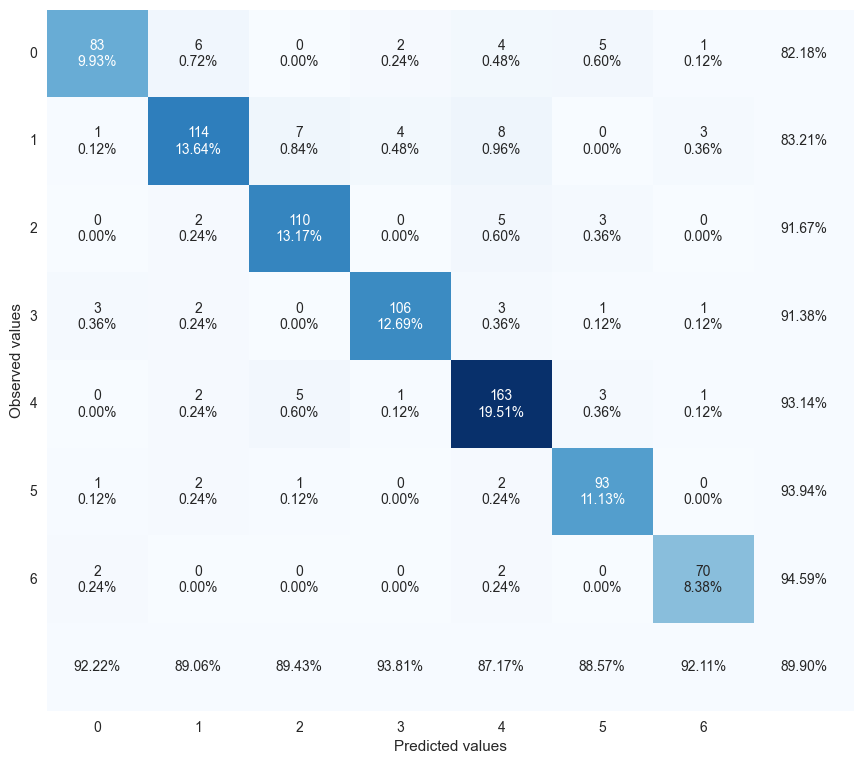

In [35]:
classifier.plot_confusion_matrix()

In [36]:
# classifier.confusion_matrix()
# test:默认=True,如果为True，返回在测试集上计算的混淆矩阵。如果为False，返回在训练集上的混淆矩阵。
# 查看模型在训练集上的混淆矩阵。
print("模型在训练集上的混淆矩阵\n", classifier.confusion_matrix(test=False))
# 查看模型在训练集上的混淆矩阵。保存结果
classifier.confusion_matrix(test=False).to_csv('data_MAC/data_澳门_modified_模型在训练集上的混淆矩阵.csv', index=False)
print("已完成，模型在训练集上的混淆矩阵，结果保存。")

# classifier.confusion_matrix(test=False)



模型在训练集上的混淆矩阵
                   Predicted values                                      \
                                 0           1           2           3   
Observed values 0        364.00000    1.000000    0.000000    0.000000   
                1          0.00000  490.000000    2.000000    0.000000   
                2          0.00000    3.000000  564.000000    0.000000   
                3          3.00000    4.000000    0.000000  369.000000   
                4          2.00000    1.000000    6.000000    1.000000   
                5          0.00000    3.000000    1.000000    0.000000   
                6          0.00000    0.000000    0.000000    0.000000   
precision                  0.98645    0.976096    0.984293    0.997297   

                                                         recall  
                            4           5           6            
Observed values 0    3.000000    0.000000    0.000000  0.989130  
                1    4.000000    0.000000    1.

In [37]:
# classifier.classification_report()

# Classification report # # 打印分类报告 包括精确率（precision）、召回率（recall）和 F1 分数，support 列表示每个类别的样本数量（总样本数）
print("分类报告:\n", classifier.classification_report())
# 查看模型分类报告。保存结果
classifier.classification_report().to_csv('data_MAC/data_澳门_modified_分类报告.csv', index=False)
print("已完成，模型分类报告，结果保存。")

分类报告:
               precision    recall  f1-score     support
0              0.922222  0.821782  0.869110  101.000000
1              0.890625  0.832117  0.860377  137.000000
2              0.894309  0.916667  0.905350  120.000000
3              0.938053  0.913793  0.925764  116.000000
4              0.871658  0.931429  0.900552  175.000000
5              0.885714  0.939394  0.911765   99.000000
6              0.921053  0.945946  0.933333   74.000000
accuracy       0.899027  0.899027  0.899027    0.899027
macro avg      0.903376  0.900161  0.900893  822.000000
weighted avg   0.899848  0.899027  0.898553  822.000000
已完成，模型分类报告，结果保存。


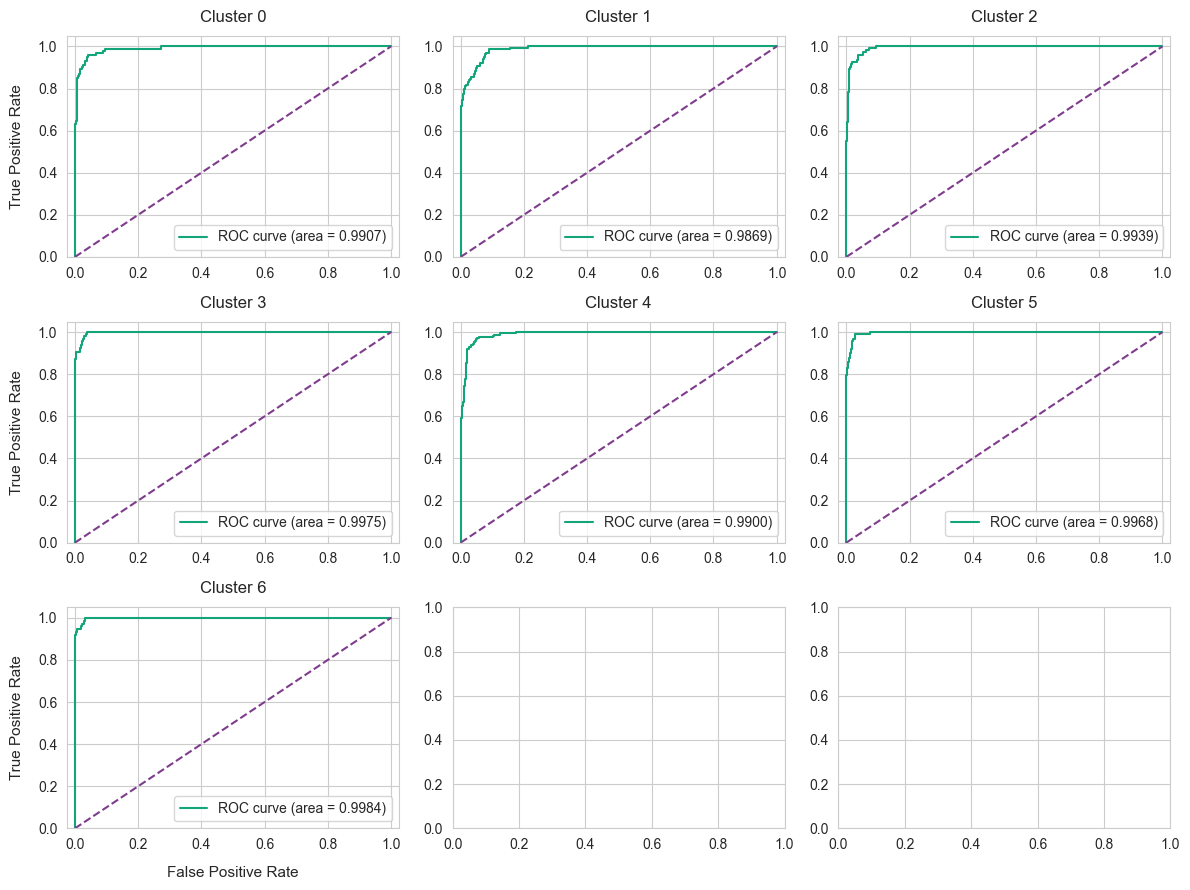

In [38]:
classifier.plot_roc_curves() # ROC curves # ROC 曲线 评估分类性能

### 3.3. Model explainability 模型可解释性

#### 3.3.1. Global feature importance 全局特征重要性

In [39]:
# Get global feature importance of the five most important features
print("前几个最重要特征的全局特征重要性:\n", classifier.feature_importances.head(10))
# 获取最重要特征的全局特征重要性 打印特征重要性，保存结果
classifier.feature_importances.to_csv('data_MAC/data_澳门_modified_全局特征重要性.csv', index=False)
print("已完成，全局特征重要性，结果保存。")

前几个最重要特征的全局特征重要性:
   variable_name  shap_importance
0        ASRREA         0.995373
1       ASBHELN         0.520983
2        ACBG15         0.487804
3       ATBGTJS         0.333604
4        ACBG09         0.314353
5       ASBHSES         0.241070
6       ATBGEAS         0.234444
7      ACDGTIHY         0.213990
8       ACBGEAS         0.197662
9       ATBGSOS         0.196322
已完成，全局特征重要性，结果保存。


已完成全局特征重要性图生成


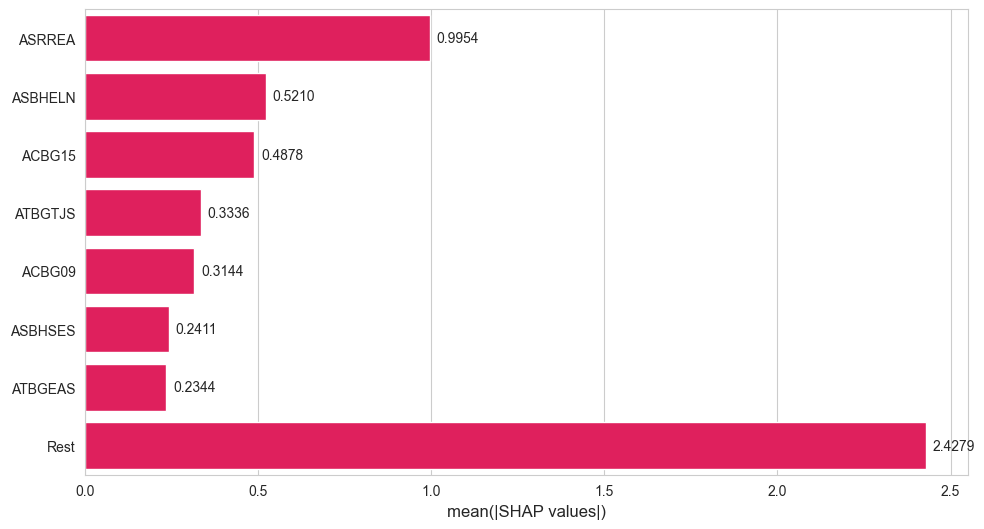

In [40]:
classifier.plot_shap_importances()

# classifier.plot_shap_importances(output_path=os.path.join("img_MAC", "全局特征重要性图classifier_global_feature_importance.jpg"))
# plt.clf()
print("已完成全局特征重要性图生成")

#### 3.3.2. Detailed feature importance by class (cluster label)

按类别（聚类标签）的详细特征重要性

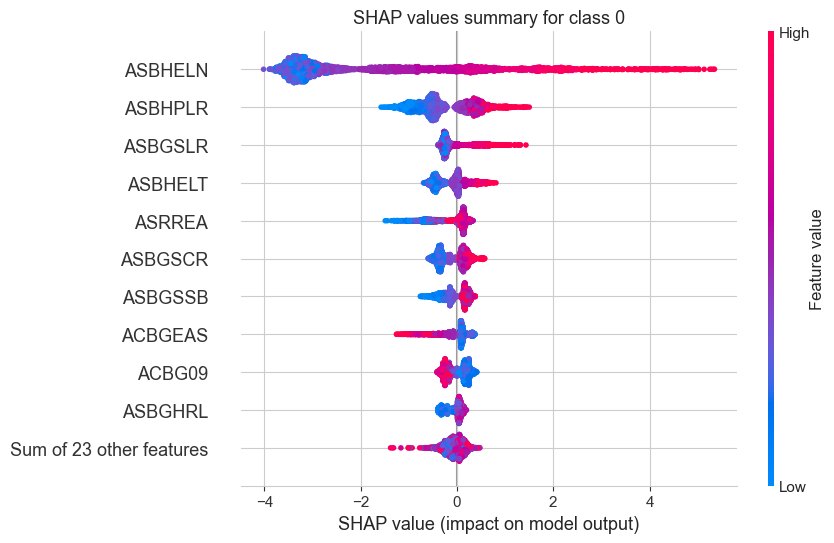

In [41]:
classifier.plot_shap_importances_beeswarm(class_id=0) #, output_path='PATH.jpg')

绘制类别 0 的特征重要性...


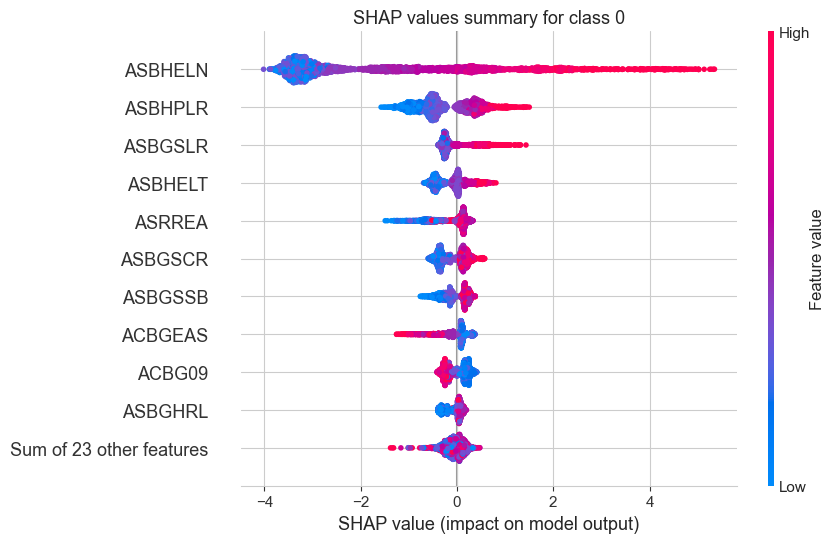

绘制类别 1 的特征重要性...


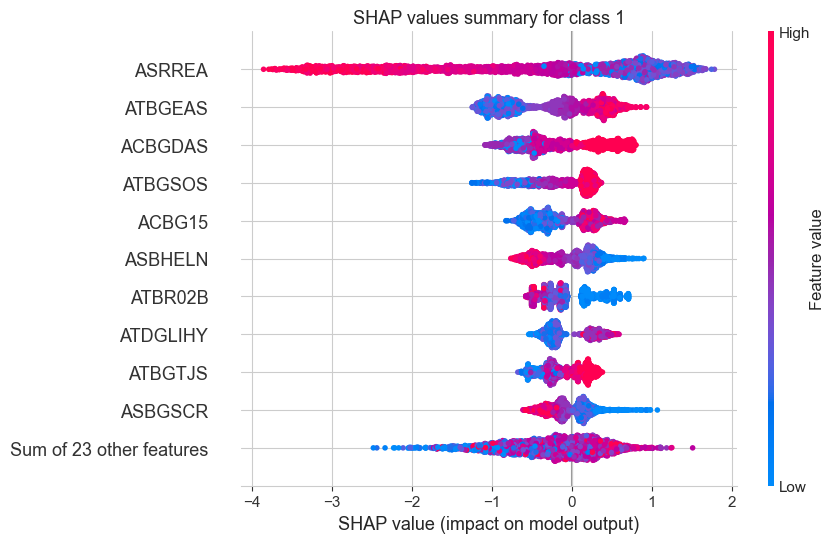

绘制类别 2 的特征重要性...


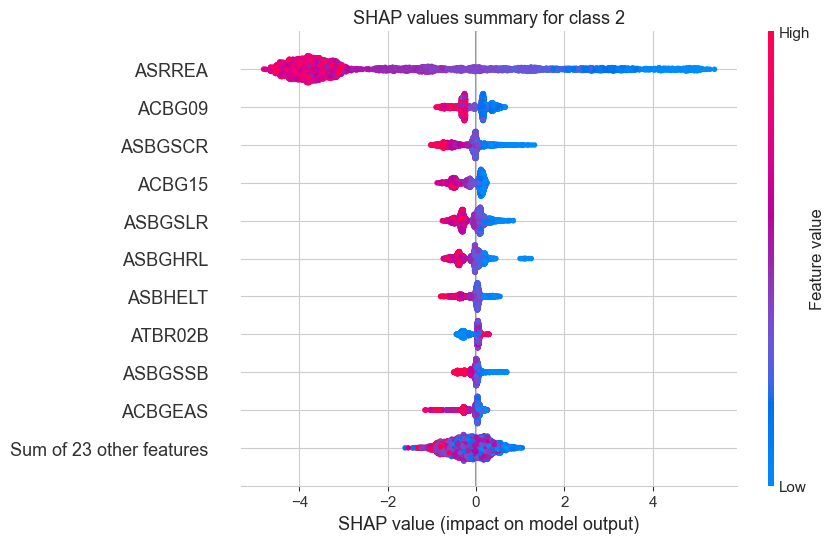

绘制类别 3 的特征重要性...


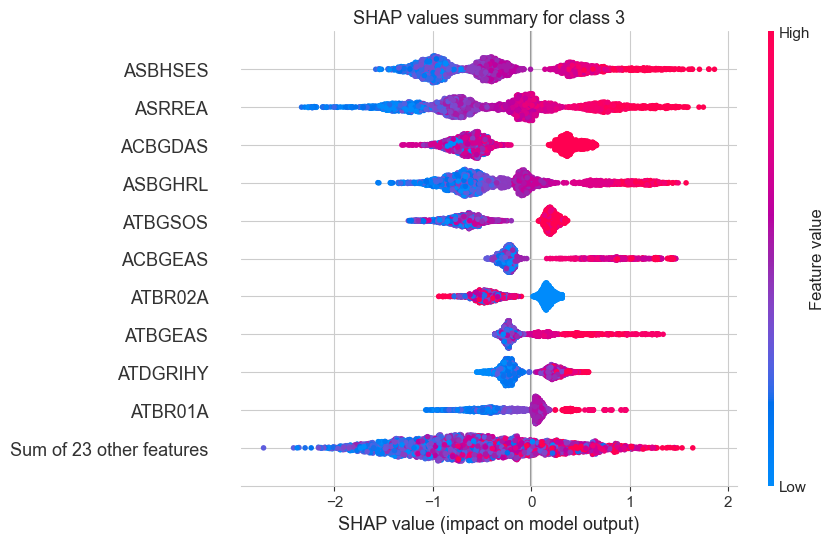

绘制类别 4 的特征重要性...


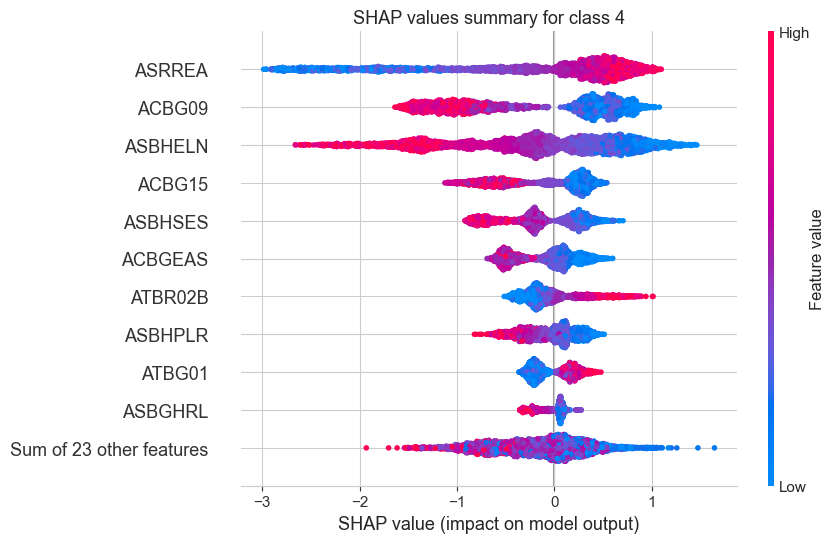

绘制类别 5 的特征重要性...


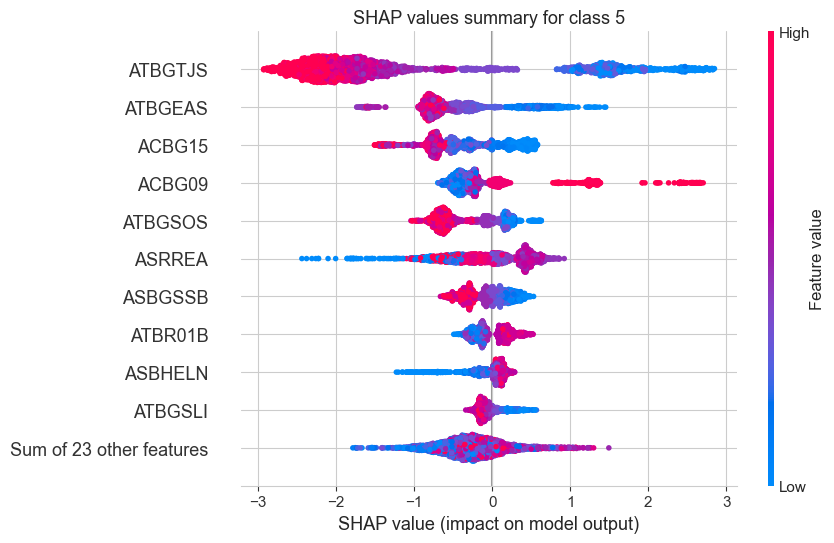

绘制类别 6 的特征重要性...


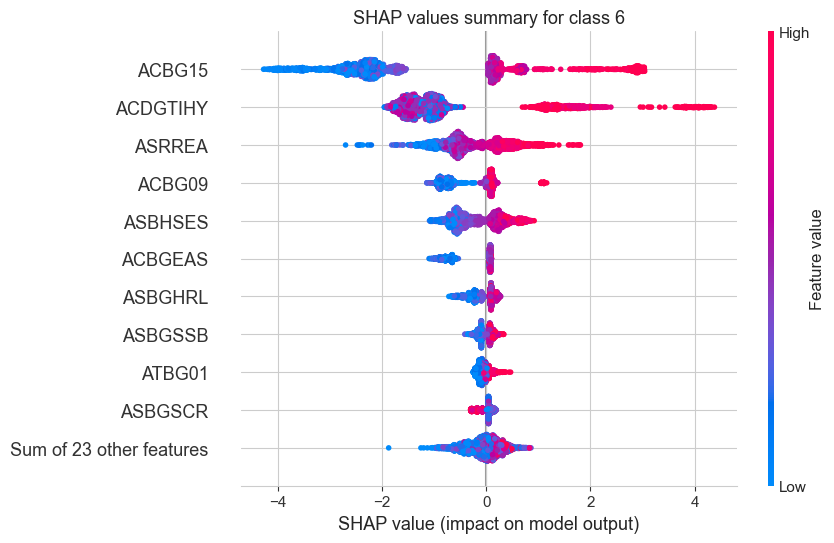

In [42]:
# 使用 SHAP 方法绘制指定类别（如 class_id=0）的特征重要性。
# 获取所有类别的唯一值
from matplotlib import pyplot as plt
all_classes = df['cluster'].unique()

# 按顺序绘制特征重要性
for class_id in sorted(all_classes):
    print(f"绘制类别 {class_id} 的特征重要性...")
    classifier.plot_shap_importances_beeswarm(class_id=class_id)
    plt.show()  # 确保每个图表单独显示
    

## Repreoducibility check 可重复性检查

In [43]:
final = classifier.df[classifier.filtered_features_ + ['cluster']].copy()
final['cluster_pred'] = classifier.model_.predict(classifier.df[classifier.filtered_features_])
final.to_csv('data_MAC/data_澳门_modified_original_vars_classification_output.csv', index=False)

In [44]:
df_ref = pd.read_csv('data_MAC/data_澳门_modified_original_vars_classification_output.csv')

print('Diff in dimension', np.abs(df_ref.shape[1] - final.shape[1]))
print('Diff in prediction', (df_ref['cluster_pred'] != final['cluster_pred']).sum())

Diff in dimension 0
Diff in prediction 0
